# StandardScaler - traz ou não pra distribuição normal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot

In [3]:
def compare_distributions(x, x_transformed, title='Standardized Variable'):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # plot histograms
    sns.histplot(x, kde=True, ax=axes[0,0])
    sns.histplot(x_transformed, kde=True, ax=axes[0,1])
    
    # visually compare with normal distribution
    probplot(x.reshape(len(x)), plot=axes[1,0])
    probplot(x_transformed.reshape(len(x)), plot=axes[1,1])
    
    axes[0,0].set_title('Original Variable')
    axes[0,1].set_title(title)
    axes[1,0].set_title(None)
    axes[1,1].set_title(None)

# StandardScaler

## Uniform

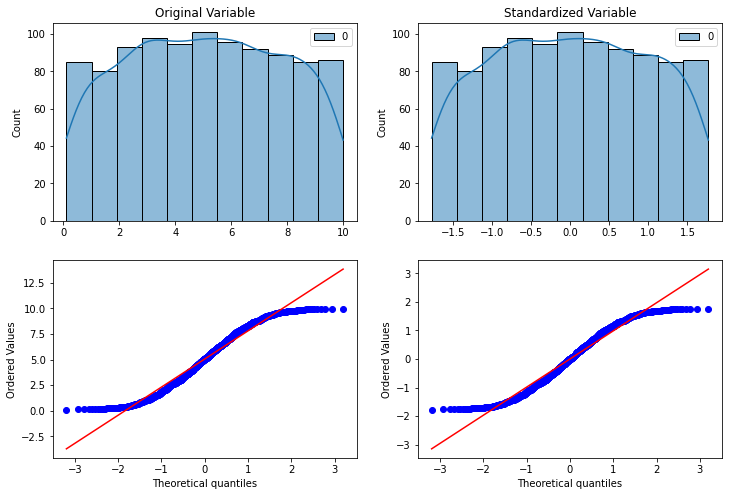

In [4]:
x = np.random.uniform(0.1, 10, size=(1000, 1))
x_std = StandardScaler().fit_transform(x)

compare_distributions(x, x_std)

## Gamma

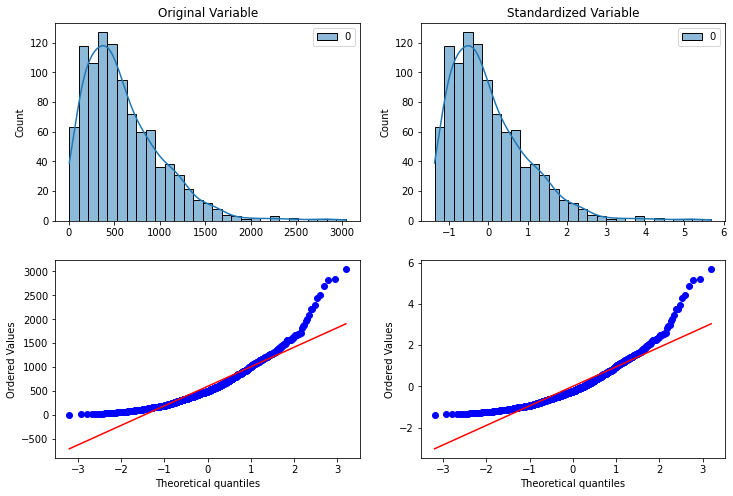

In [5]:
x = np.random.gamma(2, size=(1000, 1)) * 300
x_std = StandardScaler().fit_transform(x)
compare_distributions(x, x_std)

- não muda a distribuição, apenas faz um `shift` + `shrink`
- $X_{std} = \frac{X - \bar{X}}{σ_X}$
- note que a escala da distribuição gama acima e da distribuição uniforme, apesar de originalmente terem escalas muito diferentes, agora são comparáveis.

# Non-linear transformations

- altera a distribuição mas não necessariamente transforma em uma normal

## Log 

### Uniform

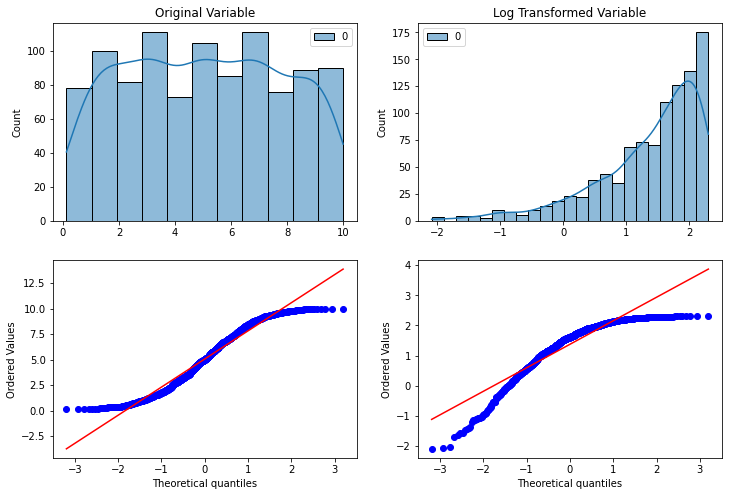

In [6]:
x = np.random.uniform(0.1, 10, size=(1000, 1))
x_std = np.log(x)
compare_distributions(x, x_std, 'Log Transformed Variable')

### Gamma

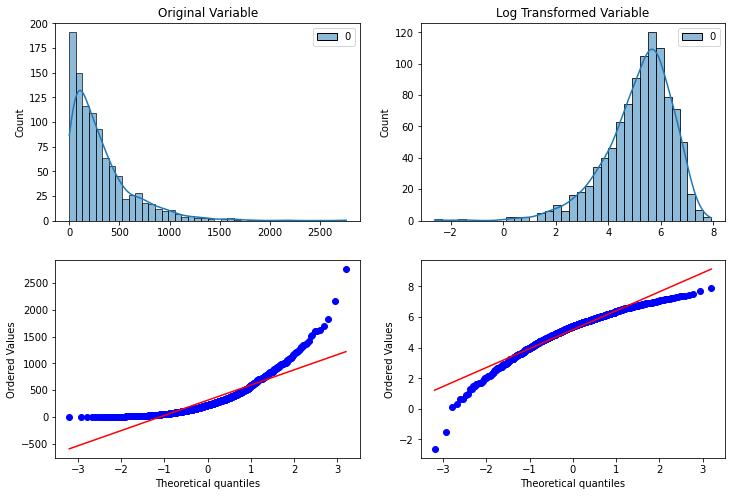

In [7]:
x = np.random.gamma(1, size=(1000, 1)) * 300
x_std = np.log(x)
compare_distributions(x, x_std, 'Log Transformed Variable')

- o log é uma transformação não linear - ou seja, ele afeta pontos diferentes de maneira diferente e, portanto, afeta a distribuição.
- note que aplicar o log na distribuição acima 'passou do ponto'. A distribuição está bem próximo da normal, mas passou um pouco

## Sqrt

### Uniform

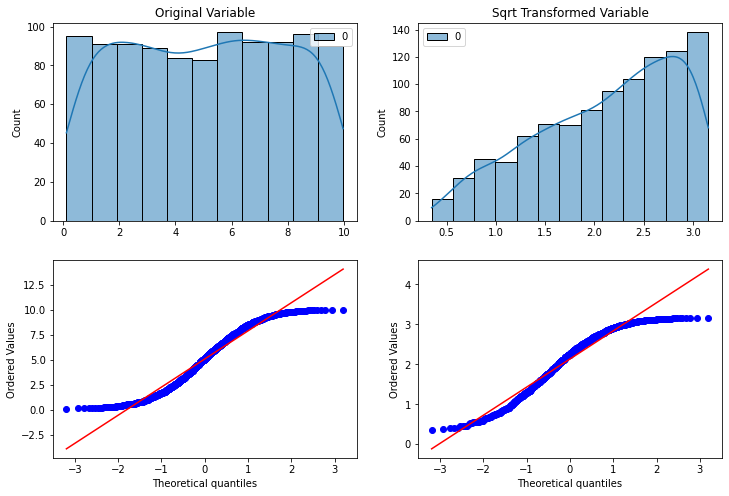

In [8]:
x = np.random.uniform(0.1, 10, size=(1000, 1))
x_std = np.sqrt(x)
compare_distributions(x, x_std, 'Sqrt Transformed Variable')

### Gamma

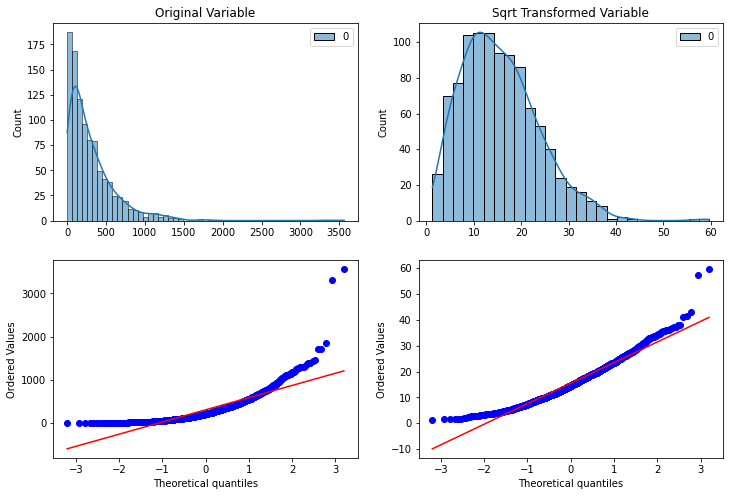

In [9]:
x = np.random.gamma(1, size=(1000, 1)) * 300
x_std = np.sqrt(x)
compare_distributions(x, x_std, 'Sqrt Transformed Variable')

- note que, agora, `sqrt` foi uma transformação que não foi suficiente. Está mais próxima da normal, mas não alcançou perfeitamente a normal

## BoxCox

- aplica a melhor transformação possível pra transformar a distribuição em uma normal
- só funciona para x > 0 (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html)

Definição: 

<font size="2">
    \begin{equation}
y(\lambda) =  \begin{cases}
      \frac{y^{\lambda}-1}{\lambda} & \text{if $\lambda \neq 0$ }\\
      \text{log} (y) & \text{if $\lambda = 0$}
    \end{cases}       
\end{equation}
</font>

Alguns exemplos abaixo.
<font size="4"> 


</font>

| Lambda (λ) | Transformação ($y(λ)$) |
|------------------|-----------------------|
| -3               | <b>$y^{-3} $= $1/y^{3}$      </b>     |
| -2               | <b>$y^{-2} $= $1/y^{2}$        </b>   |
| -1               | <b>$y^{-1} $= $1/y^{1}$        </b>   |
| -0.5             | <b>$y^{-0.5} $= ($1/\sqrt{y}$)  </b>   |
| <span style="color:red">0 </span>               | <b><span style="color:red">$log(Y) $ </span>           </b>|
| <span style="color:red">0 </span>   | <b><span style="color:red">$y^{0.5} $= $\sqrt{y}$ </span>           </b>|
| 1                | <b>$y^{1} = y$            </b>   |
| 2                | <b>$y^{2} $               </b>   |
| 3                | <b>$y^{3} $               </b>   |



In [10]:
from scipy.stats import boxcox

### Uniform

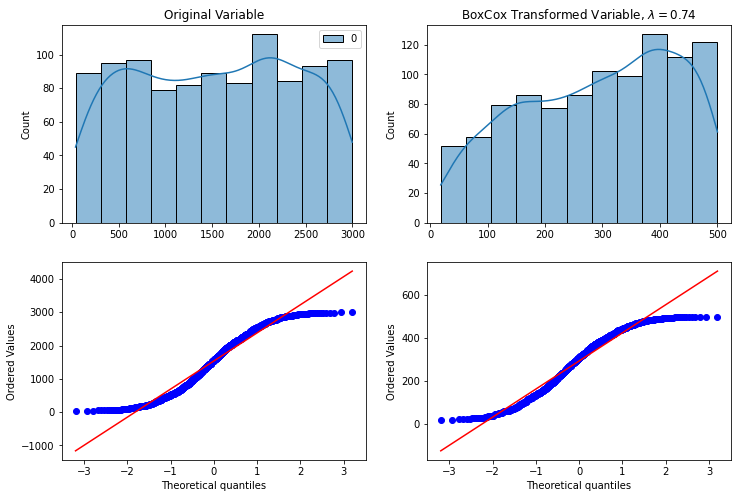

In [11]:
x = np.random.uniform(0.1, 10, size=(1000, 1)) * 300
x_std = boxcox(x.reshape(len(x)))[0]
compare_distributions(x, x_std, f'BoxCox Transformed Variable, $\lambda = {boxcox(x.reshape(len(x)))[1]:.2f}$')

### Gamma

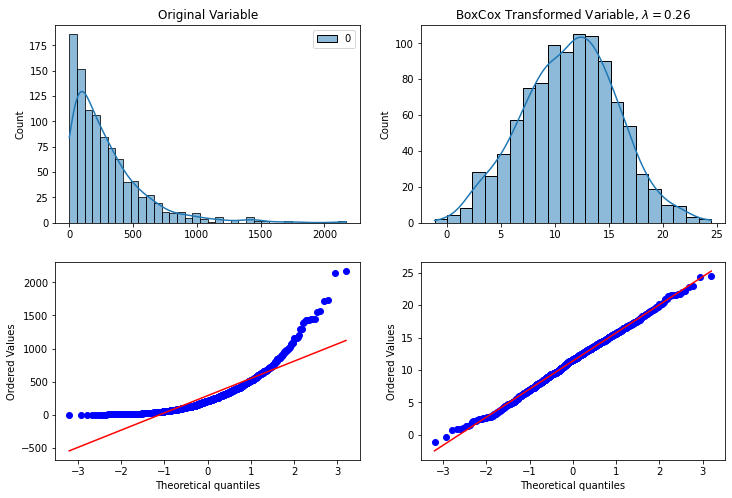

In [12]:
x = np.random.gamma(1, size=(1000, 1)) * 300
x_std = boxcox(x.reshape(len(x)))[0]
compare_distributions(x, x_std, f'BoxCox Transformed Variable, $\lambda = {boxcox(x.reshape(len(x)))[1]:.2f}$')

- o interessante aqui é que o valor de lambda escolhido será algo entre $0 \leq \lambda \leq 0.5$. Ou seja, o boxcox escolheu uma transformação que está entre o `sqrt` e `log`